In [ ]:
import os
os._exit(00)

# type 2 zeroPi

<img src="pics/twoCPB.png" width="300" />

In [54]:
import sys, os
os.chdir("../source")
import SQcircuit as sq
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

In [2]:
x = 0.02
C = sq.Capacitor(2, 'GHz')
Cshunt = sq.Capacitor(2*x, 'GHz')
Cs = sq.Capacitor(1e6,'GHz')
L = sq.Inductor(2,'GHz')
JJ = sq.Junction(15,'GHz')

circuitElements = {
    (0, 1): [Cs, L],
    (0, 2): [Cs, L],
    (1, 3): [C, JJ],
    (2, 4): [C, JJ],
    (3, 5): [Cs, L],
    (4 ,5): [Cs, L],
    (0, 5): [Cshunt]
}

cr1 = sq.Circuit(circuitElements)

cr1.setTruncationNumbers([1,1,15,15,15])

Natural frequencies of the circuit:
[2.51327517e+13 2.51327517e+13 2.56304649e+10 2.51327391e+10
 0.00000000e+00]
W transformed matrix:
[[ 0.  0.  1. -1.  1.]
 [ 0.  0.  1.  1.  1.]]


## Eigenfrequencies

In [4]:
numEig = 5
phiExt = np.linspace(0, 1, 50) * 2 * np.pi
eigenValues = np.zeros((numEig, len(phiExt)))

for i in range(len(phiExt)):
    cr1.setExternalFluxes({(1, 3): phiExt[i]})
    eigenValues[:, i], _ = cr1.run(numEig)

In [ ]:
E_L = 2
E_C = 2
plt.figure()
for i in range(numEig):
    plt.plot(phiExt / 2 / np.pi, (eigenValues[i, :] - eigenValues[0, :])/np.sqrt(16*x*(E_L/2)*E_C),'.')

plt.xlabel(r"$\Phi_{ext}/\Phi_0$")
plt.ylabel(r"($\omega_i-\omega_0$)GHz")
plt.show()

## Matrix Elements

In [53]:
numEig = 5
cr1.setExternalFluxes({(1, 3): np.pi})
vals, states = cr1.run(numEig)
O = cr1.couplingOperator("inductive", nodes= (5,4))

TypeError: Incompatible quantum object dimensions

In [ ]:
O.dims = [3*[15],3*[15]]
states[0].dims = [3*[15],3*[1]]
norm = (states[0].dag()*(O.dag()*O)*states[0])[0].real

In [ ]:
for i in range(numEig):
    states[i].dims = [3*[15],3*[1]]
    print(np.abs((states[0].dag()*O*states[i])[0])**2/norm)

## phase space eigenstates

In [ ]:
def getCmap(cmap):
    # get the transparent colormap
    

    ncolors = 256
    color_array = plt.get_cmap(cmap)(range(ncolors))
    color_array[:,-1] = np.linspace(0,1,ncolors)
    map_object = LinearSegmentedColormap.from_list(name='Transparent',colors=color_array)
    return map_object

In [54]:
circuitParam={'graph':[[0,1],[0,2],[3,5],[4,5],[1,3],[2,4],[0,5]],
            'inductors':[L,L,L,L,None,None,None],
            'capacitors':[C*1e-6,C*1e-6,C*1e-6,C*1e-6,C,C,Cshunt],
            'JJs':[None,None,None,None,E_J,E_J,None]}

cr1 = Qcircuit(circuitParam)
cr1.setModeNumbers([2,2,15,15,15])
cr1.configure()
cr1.setExcitation([0.49*2*np.pi])
cr1.run(numBand =20,showLoading=False)

In [55]:
phi_1 = 3*np.pi*np.linspace(-1,1,100)/8
phi_2 = np.pi*np.linspace(-1,1,100)
Phi_1 , Phi_2 = np.meshgrid(phi_1,phi_2)
state0  = np.squeeze(cr1.eigVecPhaseSpace(0,[0,0,0,Phi_1, Phi_2]))
state1  = np.squeeze(cr1.eigVecPhaseSpace(1,[0,0,0,Phi_1, Phi_2]))
state2  = np.squeeze(cr1.eigVecPhaseSpace(2,[0,0,0,Phi_1, Phi_2]))
state3  = np.squeeze(cr1.eigVecPhaseSpace(3,[0,0,0,Phi_1, Phi_2]))

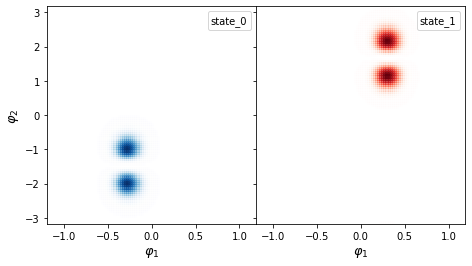

In [33]:
fig, axs = plt.subplots(1, 2,figsize=(7.5,4), sharey='row')
axs[0].pcolor(Phi_1,Phi_2,np.abs(state2)**2,cmap=getCmap("Blues"),shading='auto',label='state_0')
axs[1].pcolor(Phi_1,Phi_2,np.abs(state3)**2,cmap=getCmap("Reds"),shading='auto',label='state_1')
for i in range(2):
    axs[i].set_xlabel(r"$\varphi_1$",fontsize=13)
    axs[i].legend(handletextpad=-0.1, handlelength=0.0)
axs[0].set_ylabel(r"$\varphi_2$",fontsize=13)
plt.subplots_adjust(wspace=0)

In [56]:
K = cr1.cInv@cr1.R@cr1.R2
K = K.real
states = cr1.HamilEigVecList[0]
charges = cr1.chargeOpList

def getO(ind,K,charges):
    O = 0
    for i in range(5):
        O +=  K[ind,i]*charges[i]
    return O

In [57]:
O = getO(4,K,charges)
norm = (states[0].dag()*(O.dag()*O)*states[0])[0].real

In [58]:
(states[0].dag()*O*states[i])[0]

array([[-0.00101425-0.0003195j]])

In [59]:
for i in range(20):
    print(np.abs((states[0].dag()*O*states[i])[0])**2/norm)

[[0.]]
[[0.]]
[[0.99253585]]
[[0.00014702]]
[[0.]]
[[0.]]
[[9.0423462e-06]]
[[8.45491064e-06]]
[[0.]]
[[0.]]
[[1.41003498e-05]]
[[9.86903506e-06]]
[[0.]]
[[0.]]
[[1.86249025e-05]]
[[1.10562469e-05]]
[[0.]]
[[0.]]
[[1.8693196e-05]]
[[1.16734172e-05]]


In [60]:
K = cr1.S
fluxes = cr1.fluxOpList

def getO(ind,K,charges):
    O = 0
    for i in range(2,4):
        O +=  K[ind,i]*charges[i]
    return O

O = getO(1,K,fluxes)
norm = (states[0].dag()*(O.dag()*O)*states[0])[0].real

In [63]:
for i in range(20):
    print(np.abs((states[0].dag()*O*states[i])[0,0]))

0.19952475847865694
0.0004615575480024752
0.05897205735857903
0.0008804453103436971
7.109728164721095e-05
0.00039900414501213306
0.00012993041552470836
0.0006164082893363403
6.097785040109755e-05
0.0007731733175843206
6.285162616582266e-05
0.0010479735445710753
9.757998066987556e-05
0.0012943379964356868
5.6407178124962714e-05
0.0016304700759377179
5.844920350884587e-06
0.0018971050271797188
4.486738677897527e-07
0.0021750468096283595


In [64]:
for i in range(20):
    print(np.abs((states[0].dag()*O*states[i])[0])**2/norm)

[[0.72598293]]
[[3.884942e-06]]
[[0.06341988]]
[[1.41363599e-05]]
[[9.21804484e-08]]
[[2.90327142e-06]]
[[3.07860861e-07]]
[[6.9289873e-06]]
[[6.78073927e-08]]
[[1.09015071e-05]]
[[7.20386991e-08]]
[[2.002781e-05]]
[[1.736418e-07]]
[[3.05511966e-05]]
[[5.8023186e-08]]
[[4.84795399e-05]]
[[6.2300283e-10]]
[[6.56319902e-05]]
[[3.67108445e-12]]
[[8.62720346e-05]]


In [48]:
(cr1.getMatL()@cr1.S).real[:,4]

array([-4.67869189e-11,  9.62603730e-10, -1.92014720e-11,  5.34680801e-10,
       -5.15479329e-10])

In [50]:
cr1.S.real[:,4]

array([-5.92563250e-13,  1.21915187e-11,  3.69735163e+01,  3.69735163e+01,
        3.69735163e+01])

In [ ]:
circuitParam={'graph':[[0,1],[0,2],[3,5],[4,5],[1,3],[2,4],[0,5]],
            'inductors':[L,L,L,L,None,None,None],
            'capacitors':[C*1e-6,C*1e-6,C*1e-6,C*1e-6,C,C,Cshunt],
            'JJs':[None,None,None,None,E_J,E_J,None]}

cr1 = Qcircuit(circuitParam)

In [400]:
cr1.setModeNumbers([1,1,15,15,15])
cr1.configure()

In [401]:
phiExt = np.linspace(0,1,100)*2*np.pi
cr1.setExcitation([phiExt])

In [403]:
# cr1.run(numBand = 20,showLoading=False)

In [267]:
# plt.figure()
# for i in range(4):
#     plt.plot(phiExt/2/np.pi,(cr1.HamilEigVal[i,:]-cr1.HamilEigVal[0,:]).real*hbar/np.sqrt(16*x*(E_L/2)*E_C),'.')

# plt.xlabel("$\Phi_{ext}/\Phi_0$")
# plt.ylabel("GHz")